# GCP 설정

**GCP - 사용자 인증 정보 - API 제한사항 - 키제한 설정 (Geocoding API만 구동되게)**

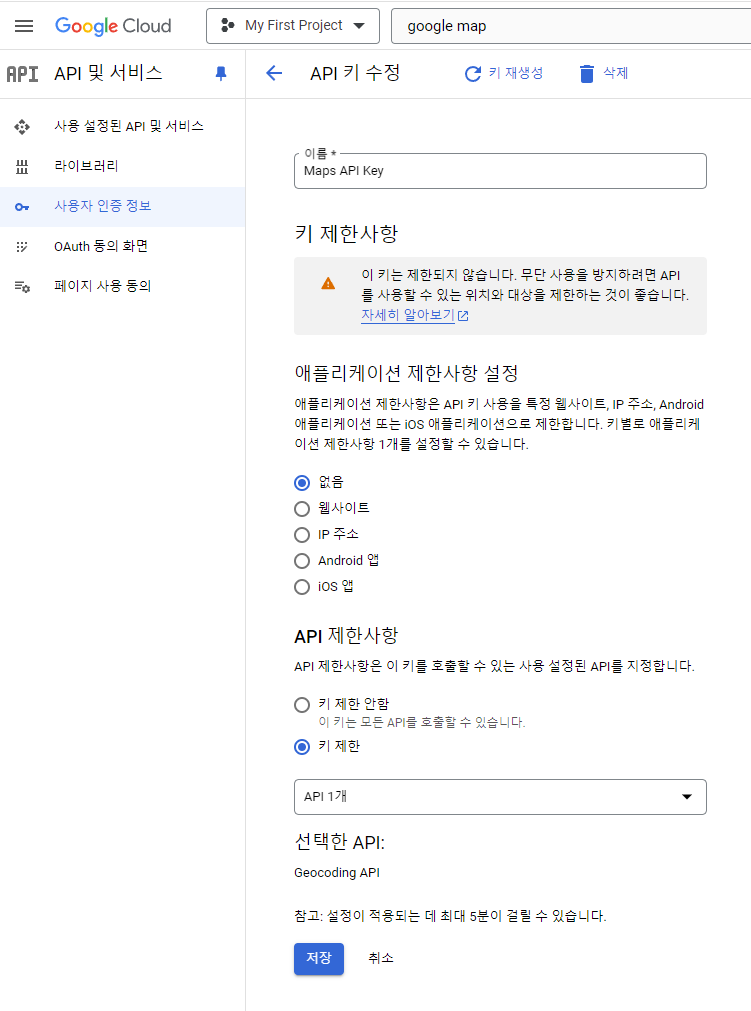

**GCP - Google Maps Platform - API 및 서비스 - Geocoding API DISABLE 확인**

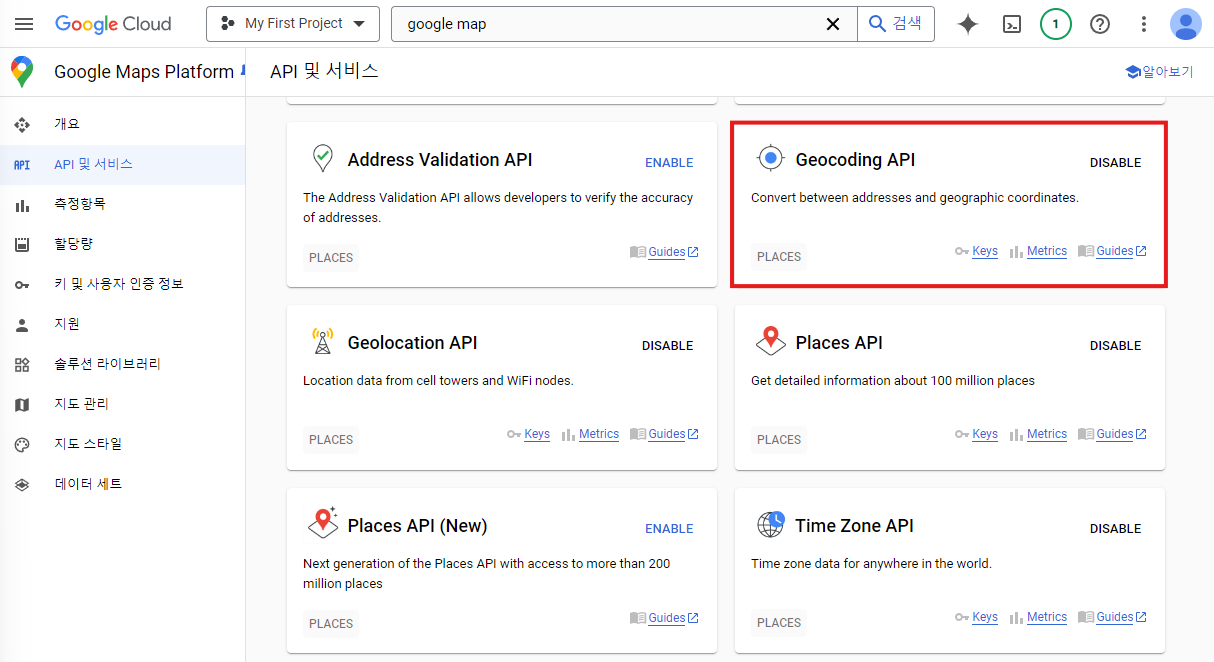

**코랩 - 코랩 만들기 - 보안 비밀 - 새 보안 비밀 추가 - 구글맵스 키값 붙여넣기**

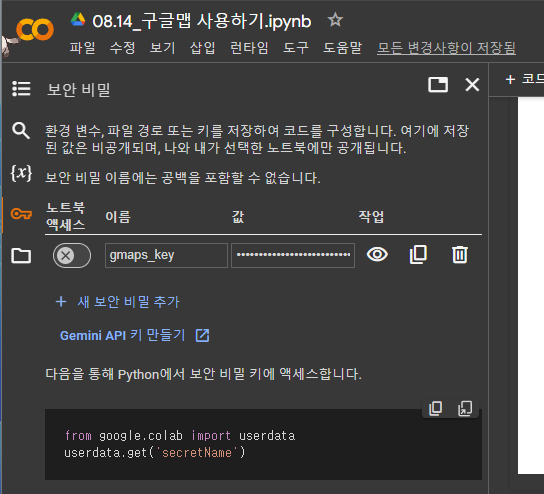

In [ ]:
# 코랩에 등록한 gmaps_key를 가져다 쓰는 코드

from google.colab import userdata
userdata.get('secretName')

**코랩에서 사용하려면 노트북 액세스 on 해야 함**

# 주의사항! WARNING!

**VS CODE에서는 dotenv로 환경변수를 설정해서 여기에 gmaps_key를 넣어서 관리함**

**dotenv파일은 절대 github에 올리지 않는다**



---



# gmaps_key 사용

## 1. 코랩에 구글맵스 라이브러리를 설치한다

In [5]:
! pip install googlemaps

  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40716 sha256=08375c4b3be8beedd24ea1d5832a6b9e8e9640ac4825a9face5ec50c11daaccd
  Stored in directory: /root/.cache/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps


## !! key값이 안보이게 변수로 받아서 실행한다

In [6]:
from google.colab import userdata
mygkey = userdata.get('gmaps_key')

In [7]:
import googlemaps

gmaps = googlemaps.Client(key=mygkey)

In [8]:
# 주소찾기 서울시청 test
addr = "서울시청"

try :
    result = gmaps.geocode(addr, language='ko')
    print(result) # 지오코딩 결과가 성공적일때 출력
except googlemaps.exceptions.ApiError as er:
    print(f"Error: (er)") # API 오류시 오류메시지

[{'address_components': [{'long_name': '110', 'short_name': '110', 'types': ['premise']}, {'long_name': '세종대로', 'short_name': '세종대로', 'types': ['political', 'sublocality', 'sublocality_level_4']}, {'long_name': '중구', 'short_name': '중구', 'types': ['political', 'sublocality', 'sublocality_level_1']}, {'long_name': '서울특별시', 'short_name': '서울특별시', 'types': ['administrative_area_level_1', 'political']}, {'long_name': '대한민국', 'short_name': 'KR', 'types': ['country', 'political']}, {'long_name': '04524', 'short_name': '04524', 'types': ['postal_code']}], 'formatted_address': '대한민국 서울특별시 중구 세종대로 110', 'geometry': {'location': {'lat': 37.5665851, 'lng': 126.9782038}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 37.56793408029149, 'lng': 126.9795527802915}, 'southwest': {'lat': 37.5652361197085, 'lng': 126.9768548197085}}}, 'partial_match': True, 'place_id': 'ChIJKwjLMvOifDURqPAMQqxwK-k', 'plus_code': {'compound_code': 'HX8H+J7 대한민국 서울특별시', 'global_code': '8Q98HX8H+J7'}, 'types'

In [9]:
result[0]

# 전체 주소정보

{'address_components': [{'long_name': '110',
   'short_name': '110',
   'types': ['premise']},
  {'long_name': '세종대로',
   'short_name': '세종대로',
   'types': ['political', 'sublocality', 'sublocality_level_4']},
  {'long_name': '중구',
   'short_name': '중구',
   'types': ['political', 'sublocality', 'sublocality_level_1']},
  {'long_name': '서울특별시',
   'short_name': '서울특별시',
   'types': ['administrative_area_level_1', 'political']},
  {'long_name': '대한민국', 'short_name': 'KR', 'types': ['country', 'political']},
  {'long_name': '04524', 'short_name': '04524', 'types': ['postal_code']}],
 'formatted_address': '대한민국 서울특별시 중구 세종대로 110',
 'geometry': {'location': {'lat': 37.5665851, 'lng': 126.9782038},
  'location_type': 'ROOFTOP',
  'viewport': {'northeast': {'lat': 37.56793408029149,
    'lng': 126.9795527802915},
   'southwest': {'lat': 37.5652361197085, 'lng': 126.9768548197085}}},
 'partial_match': True,
 'place_id': 'ChIJKwjLMvOifDURqPAMQqxwK-k',
 'plus_code': {'compound_code': 'HX8H+J7 대한

In [11]:
# 1> 지명을 넣으면 주소가 나옴
result[0]['formatted_address']

'대한민국 서울특별시 중구 세종대로 110'

In [12]:
# 2> 우리가 필요한 위도, 경도값만 구한다
result[0]['geometry']['location']

{'lat': 37.5665851, 'lng': 126.9782038}